# Equalização de histograma e algoritmo de Otsu

## Índice

1. Introdução
2. Equalização de histograma
3. Algoritmo de Otsu

---

## 1. Introdução

- Feito por: Kenzo Inanami de Faria <br>
- Objetivos:
  1. Implementar o algoritmo para equalização de histograma na imagem: https://sipi.usc.edu/database/download.php?vol=misc&img=5.3.01
  2. Implementar o algoritmo de Otsu para binarização de imagens na imagem: https://st2.depositphotos.com/2577341/6174/i/600/depositphotos_61747611-stock-photo-green-leaf.jpg


## 2. Equalização de Histograma


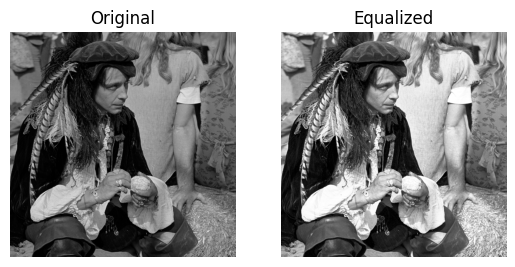

In [ ]:
import numpy as np
import skimage
from math import ceil
import matplotlib.pyplot as plt
import sys

def get_histogram(img):
  hist = np.zeros(256)
  for line in img:
    for pixel in line:
      hist[pixel] += 1
  return hist

def histogram_equalization(img):
  x, y = img.shape
  equalized_image = np.zeros((x,y))

  # Pega o historigrama
  hist = get_histogram(img)

  # Soma cumulativa
  cdf = []
  for i in range(256):
    cdf.append(sum(hist[:i+1]))

  # Soma cumulativa normalizada para o intervalo 0-255
  cdf_normalized = []
  for i in range(256):
    cdf_normalized.append(ceil((cdf[i] - cdf[0]) * 255 / (img.size - cdf[0])))

  # Substituindo os valores
  for i in range(x):
    for j in range(y):
      equalized_image[i][j] = cdf_normalized[img[i][j]]

  return equalized_image



# Lendo a imagem
image = skimage.io.imread("Imagens/5.3.01.tiff")

# Testando se a imagem foi lida
if image is None:
  print("Imagem não foi lida, confira se o nome e extensão estão corretos")
  sys.exit(0)

# Aplicando a equalização de histograma
equalized_image = histogram_equalization(image)

#Mostrando as imagens
fig, ax = plt.subplots(1, 2)

# Inserindo a original para comparação
ax.ravel()[0].imshow(image, cmap=plt.cm.gray)
ax.ravel()[0].set_title('Original')
ax.ravel()[0].axis('off')
ax.ravel()[1].imshow(equalized_image, cmap=plt.cm.gray)
ax.ravel()[1].set_title('Equalized')
ax.ravel()[1].axis('off')

plt.show()


## 3. Algoritmo de Otsu


Variância máxima obtida: 134353.5162872821
Valor ótimo de t: 101


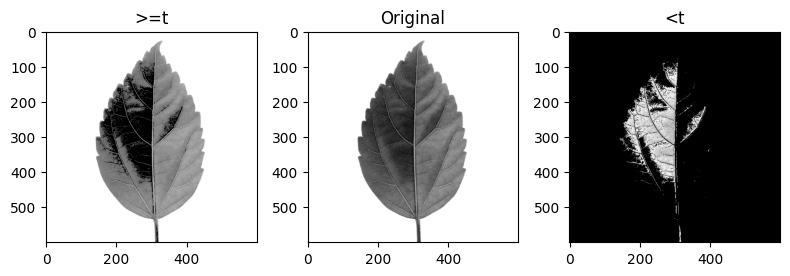

In [ ]:
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
import cv2
import sys

def get_histogram(image):
  hist = np.zeros(256)
  for line in image:
    for pixel in line:
      hist[int(pixel)] += 1
  return hist

def get_prob(hist,image):
  prob = []
  N = image.size
  for i in range(256):
    prob.append(sum(hist[:i])/N)
  return prob

def get_Ws(prob, n):
  w1 = sum(prob[:n])

  w2 = 1 - w1

  return w1, w2

def get_mean(prob, n,w):
  mean = 0
  for i in range(n):
    mean = mean + i*prob[i]

  return mean/w

def get_variance(w1,w2,mean1,mean2):
  return w1*w2* ((mean1 - mean2)**2)

def otsu(image):
  hist = get_histogram(image)
  prob = get_prob(hist,image)
  max_var = 0 # variância intraclasse

  # Testando para t entre 0-256
  for t in range(256):
    # Probabilidade de estar a esquerda e a direita do limiar
    w1,w2 = get_Ws(prob,t)
    if(w1 != 0):
      mean1 = get_mean(prob, t,w1)
      mean2 = get_mean(prob, t,w2)
      var = get_variance(w1,w2,mean1,mean2)
      if(var>max_var):
        max_var = var
        tr = t

  return max_var, tr

image = cv2.imread("Imagens/depositphotos_61747611-stock-photo-green-leaf.webp", 0)

# Testando se a imagem foi lida
if image is None:
  print("Imagem não foi lida, confira se o nome e extensão estão corretos")
  sys.exit(0)

# Pegando os resultados
max_var, t = otsu(image)

# Mostrando resultados
print(f"Variância máxima obtida: {max_var}")
print(f"Valor ótimo de t: {t}")
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

# Mostrando as imagens
imageGt = np.zeros((600,600))
imageLt = np.zeros((600,600))
for i in range(600):
  for j in range(600):
    if(image[i][j]>=t):
      imageGt[i][j] = image[i][j]
    else:
      imageLt[i][j] = image[i][j]


ax[0].imshow(imageGt, cmap=plt.cm.gray)
ax[0].set_title(">=t")
ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].set_title("Original")
ax[2].imshow(imageLt, cmap=plt.cm.gray)
ax[2].set_title("<t")
fig.tight_layout()

plt.show()